In [14]:
import os
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [15]:
# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 1
dataset_dir=r'E:\2023 OBU-CDUT\2023 Semester 1\crc_skin_data'
batch_size=4

## The block of code sets up data augmentation for training images using the ImageDataGenerator class from the Keras library. Data augmentation is a technique commonly used in deep learning to artificially increase the size of the training dataset by applying various transformations to the existing images

### train_datagen = ImageDataGenerator(: This line creates an instance of the ImageDataGenerator class and assigns it to the variable train_datagen. This object will be used to perform data augmentation on the training images.

### rescale=1./255,: This parameter rescales the pixel values of the images by dividing them by 255. This normalization step brings the pixel values to the range of [0, 1], which is commonly done to ensure the input values are within a suitable range for training.

### shear_range=0.2,: This parameter specifies the range for applying shear transformations to the images. Shear transformations slant the image in a certain direction, creating a distorted effect.

### zoom_range=0.2,: This parameter specifies the range for applying zoom transformations to the images. Zoom transformations change the scale of the image, either making it larger or smaller.

### horizontal_flip=True): This parameter enables horizontal flipping of the images. It randomly flips the images horizontally, creating a mirror image effect. This augmentation technique is useful when there is no specific horizontal orientation in the data.



In [16]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

### test_datagen = ImageDataGenerator(rescale=1./255): This line creates another instance of the ImageDataGenerator class and assigns it to the variable test_datagen. This object is used for preprocessing the test/validation images, but it doesn't apply any data augmentation techniques except for the rescaling of pixel values.

In [17]:

# Test data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

## This code generates the training dataset using the flow_from_directory method of the train_datagen object. It prepares the data to be fed into the model during the training process.

### train_generator = train_datagen.flow_from_directory(: This line calls the flow_from_directory method of the train_datagen object to generate the training dataset iterator and assigns it to the variable train_generator. This iterator will generate batches of augmented images along with their corresponding labels.

### os.path.join(dataset_dir, 'train'): This line uses the os.path.join function to construct the directory path for the training dataset. It combines the dataset_dir (the root directory where the dataset is located) with the 'train' subdirectory, which typically contains the training images.

### target_size=input_shape[:2],: This parameter specifies the target size to which the images should be resized. It uses the input_shape variable, which represents the desired input shape of the model, and takes the first two elements of the shape (width and height). The images in the training dataset will be resized to this target size.

### batch_size=batch_size,: This parameter specifies the number of samples in each batch of the training dataset. The batch_size variable represents the desired batch size for training.

### class_mode='binary': This parameter specifies the type of labels to generate for the training dataset. In this case, 'binary' indicates that the labels are two classes represented '0 or 1' 

### ): This closing parenthesis ends the flow_from_directory method call.

In [18]:

# Generate the train dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

Found 500 images belonging to 2 classes.


### validation_generator = test_datagen.flow_from_directory(: This line calls the flow_from_directory method of the train_datagen object to generate the training dataset iterator and assigns it to the variable train_generator. This iterator will generate batches of augmented images along with their corresponding labels.

### os.path.join(dataset_dir, 'train'): This line uses the os.path.join function to construct the directory path for the training dataset. It combines the dataset_dir (the root directory where the dataset is located) with the 'train' subdirectory, which typically contains the training images.

### target_size=input_shape[:2],: This parameter specifies the target size to which the images should be resized. It uses the input_shape variable, which represents the desired input shape of the model, and takes the first two elements of the shape (width and height). The images in the training dataset will be resized to this target size.

### batch_size=batch_size,: This parameter specifies the number of samples in each batch of the training dataset. The batch_size variable represents the desired batch size for training.

### class_mode='binary': This parameter specifies the type of labels to generate for the training dataset. In this case, 'binary' indicates that the labels are two classes represented '0 or 1' 

### ): This closing parenthesis ends the flow_from_directory method call.

In [19]:

# Generate the validation dataset
validation_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

Found 500 images belonging to 2 classes.


### test_generator = test_datagen.flow_from_directory(: This line calls the flow_from_directory method of the train_datagen object to generate the training dataset iterator and assigns it to the variable train_generator. This iterator will generate batches of augmented images along with their corresponding labels.

### os.path.join(dataset_dir, 'train'): This line uses the os.path.join function to construct the directory path for the training dataset. It combines the dataset_dir (the root directory where the dataset is located) with the 'train' subdirectory, which typically contains the training images.

### target_size=input_shape[:2],: This parameter specifies the target size to which the images should be resized. It uses the input_shape variable, which represents the desired input shape of the model, and takes the first two elements of the shape (width and height). The images in the training dataset will be resized to this target size.

### batch_size=batch_size,: This parameter specifies the number of samples in each batch of the training dataset. The batch_size variable represents the desired batch size for training.

### class_mode='binary': This parameter specifies the type of labels to generate for the training dataset. In this case, 'binary' indicates that the labels are two classes represented '0 or 1' 

### ): This closing parenthesis ends the flow_from_directory method call.

In [20]:
# Generate the test dataset
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


### def residual_block(inputs, num_filters):: This line defines a function named residual_block that takes two parameters: inputs (the input tensor) and num_filters (the number of filters in the convolutional layers).

### x = Conv2D(num_filters, kernel_size=(3, 3), padding='same')(inputs): This line applies a 2D convolutional layer to the inputs tensor with num_filters filters, each with a kernel size of 3x3 and same padding. The result is stored in the x variable.

### x = BatchNormalization()(x): This line applies batch normalization to the x tensor, which normalizes the activations and helps with training stability and speed.

### x = Activation('relu')(x): This line applies the ReLU activation function to the x tensor, introducing non-linearity to the model.

### x = Conv2D(num_filters, kernel_size=(3, 3), padding='same')(x): This line applies another 2D convolutional layer to the x tensor with num_filters filters and 3x3 kernel size, preserving the spatial dimensions with same padding.

### x = BatchNormalization(a)(x): This line applies batch normalization to the x tensor, similar to line 4.

### if inputs.shape[-1] != num_filters:: This line checks if the number of channels in the inputs tensor is not equal to num_filters. This condition is used to determine whether a skip connection is needed or not.

### shortcut = Conv2D(num_filters, kernel_size=(1, 1), padding='same')(inputs): This line applies a 1x1 convolutional layer to the inputs tensor to match the number of filters (num_filters) of the x tensor. This operation is used when the skip connection is required.

### shortcut = BatchNormalization()(shortcut): This line applies batch normalization to the shortcut tensor, similar to line 4.

### shortcut = inputs: This line assigns the inputs tensor to the shortcut variable when the skip connection is not needed.

### x = Add()([x, shortcut]): This line adds the x tensor and the shortcut tensor element-wise, implementing the skip connection.

### x = Activation('relu')(x): This line applies the ReLU activation function to the resulting tensor x.

### return x: This line returns the output tensor x from the residual_block function.



In [21]:
# Define the residual block
def residual_block(inputs, num_filters):
    # Convolutional layers
    x = Conv2D(num_filters, kernel_size=(3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Skip connection
    if inputs.shape[-1] != num_filters:
        shortcut = Conv2D(num_filters, kernel_size=(1, 1), padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs
    
    # Add skip connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

### def ResNet(input_shape, num_classes):: This line defines a function named ResNet that takes two parameters: input_shape (the shape of the input tensor) and num_classes (the number of classes for classification).

### inputs = Input(shape=input_shape): This line creates a Keras input tensor with the specified input_shape and assigns it to the inputs variable.

### x = Conv2D(64, kernel_size=(7, 7), padding='same')(inputs): This line applies a 2D convolutional layer to the inputs tensor with 64 filters and a larger 7x7 kernel size, preserving spatial dimensions.

### x = BatchNormalization()(x): This line applies batch normalization to the x tensor.

### x = Activation('relu')(x): This line applies the ReLU activation function to the x tensor.

### 34-39. x = residual_block(x, num_filters): These lines apply the residual_block function multiple times, passing the x tensor and the specified num_filters for each block. This builds the residual part of the ResNet model.

### x = GlobalAveragePooling2D()(x): This line applies global average pooling to the x tensor, reducing the spatial dimensions to a vector.

### x = Dense(512, activation='relu')(x): This line applies a fully connected layer to the x tensor with 512 units and applies the ReLU activation function.

### outputs = Dense(num_classes, activation='softmax')(x): This line applies a fully connected layer to the x tensor with num_classes units (output classes) and applies the softmax activation function to obtain class probabilities.

### model = Model(inputs=inputs, outputs=outputs): This line creates a Keras Model object by specifying the inputs tensor as the model's input and the outputs tensor as the model's output.

### return model: This line returns the created model.

### model = ResNet(input_shape, num_classes): This line creates an instance of the ResNet model by calling the ResNet function with the specified input_shape and num_classes arguments, and assigns it to the model variable.

In [22]:
from keras.layers import MaxPooling2D
# Define the ResNet-like model
def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), padding='valid')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(3,3)(x)
    x = Activation('relu')(x)
    
    # Residual blocks
    x = residual_block(x, 64) # 2 conv layers
    x = residual_block(x, 64) # 2 conv layers
    
    x = residual_block(x, 128) # 2 conv layers
    x = residual_block(x, 128) # 2 conv layers
    
    x = residual_block(x, 256) # 2 conv layers
    x = residual_block(x, 256) # 2 conv layers
    
    # Global average pooling and fully connected layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    
    # Output layer
    outputs = Dense(num_classes, activation='sigmoid')(x)
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [23]:
# Create the ResNet model
model = ResNet(input_shape, num_classes)

In [24]:
#from keras.optimizers import Adam
#optimizer=Adam(lr=0.001)
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 218, 218, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 218, 218, 64) 256         conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 72, 72, 64)   0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

In [26]:
# Train the model
history=model.fit(train_generator,epochs=1,validation_data=validation_generator,verbose=1)

125/125 [==============================] - 179s 1s/step - loss: 0.6876 - accuracy: 0.6680 - val_loss: 0.7613 - val_accuracy: 0.3300


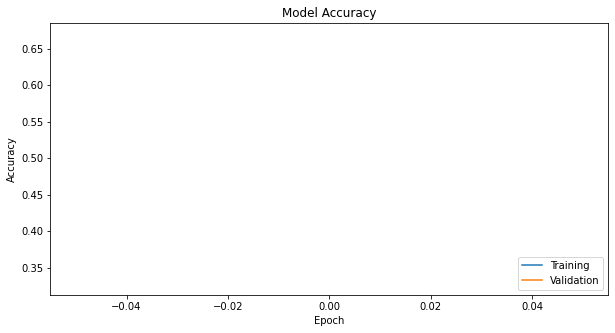

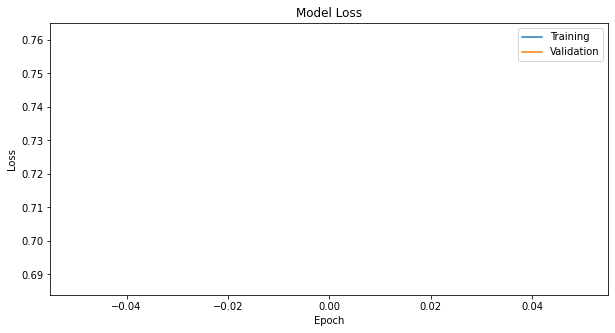

In [28]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [29]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

25/25 [==============================] - 6s 245ms/step - loss: 0.7591 - accuracy: 0.3200
Test loss: 0.75913405418396
Test accuracy: 0.3199999928474426


### from keras import backend as K: This line imports the backend module from the Keras library and assigns it the alias K. The backend module provides low-level operations and functions for working with tensors, which are multi-dimensional arrays used for deep learning computations.

### import gc: This line imports the gc module, which stands for garbage collector. The garbage collector is responsible for freeing up memory by reclaiming objects that are no longer in use.

### K.clear_session(): This line clears the Keras session. A session in Keras is a way to organize and execute a sequence of operations, such as building and training a neural network model. Clearing the session releases any resources associated with the current session, including tensors and variables.

### gc.collect(): This line triggers the garbage collector to collect and free any unused memory. Calling gc.collect() helps to ensure that any unreferenced objects are properly cleaned up and their memory is reclaimed.

### del model: This line deletes the variable model. It removes the reference to the model object and frees up the memory it was occupying. This step is useful when you want to release the resources associated with a model that is no longer needed.

### Overall, this code is a common practice in deep learning to clear the session, perform garbage collection, and delete the model to manage memory usage and avoid potential memory leaks.

In [30]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model

### from numba import cuda: This line imports the cuda module from the numba library. The cuda module provides an interface to interact with NVIDIA GPUs for parallel computing tasks. It allows you to utilize the power of the GPU to accelerate certain computations.

### cuda.select_device(0): This line selects the CUDA device with index 0. CUDA is a parallel computing platform and API model created by NVIDIA that allows developers to perform general-purpose computing on GPUs. By calling select_device(0), the code specifies that the GPU with index 0 should be used for computation. If you have multiple GPUs, you can change the index to select a different GPU.

### cuda.close(): This line closes the CUDA context. When you're done using the GPU resources, it's good practice to close the CUDA context to release any associated memory and resources. This ensures that the GPU resources are freed up and can be used by other applications or processes.



In [31]:
# you will need to install numba using "pip install numba"
from numba import cuda

cuda.select_device(0)
cuda.close()